In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

file_paths = {
    2019: "c:Bangalore's_Schools_2019.xlsx",
    2020: "c:Bangalore's_Schools_2020.xlsx",
    2021: "c:Bangalore's_School_2021.xlsx"
}

In [11]:
#Problem Statement 1 )Reward the top performer(student) of each school based on cumulative marks scored in last three years for all the subject
# Function used to  read and combine data for each year 
def read_and_combine(file_path, year):
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Added the year column
    df['Year'] = year
    
    return df

# Read and combine data from all years (2019, 2020, 2021)
data_frames = [read_and_combine(file_paths[year], year) for year in file_paths]
combined_data = pd.concat(data_frames, ignore_index=True)

# List of subjects
subject_columns = ['Hindi', 'English', 'Mathematics', 'Physics', 'Chemistry',
                   'Biology', 'History', 'Geography', 'Civics', 'Computer Science', 'Physical Education']



# Calculating  Total Marks for each student by summing the subject columns
combined_data['Total Marks'] = combined_data[subject_columns].sum(axis=1)

#Adding new column for Total aggregate for 3 years - student wise
combined_data['Total aggregate'] = combined_data.groupby(['Student Roll'])['Total Marks'].transform('sum')



# Sorting by School and Student total aggregate marks scored for all years
cumulative_marks_sorted = combined_data.sort_values(by=['Total aggregate','School Name'], ascending=[False, True])

#Removing duplicate data from the dataset
cumulative_marks = cumulative_marks_sorted.drop_duplicates(subset=['Student Roll'])

#Grouping by school name, student name and roll number
cumulative_marks_groupby = cumulative_marks.groupby(['School Name', 'Student Name','Student Roll'])['Total aggregate'].sum().reset_index()

#sorting again based on school name and aggregate score
cumulative_marks_groupby_sort = cumulative_marks_groupby.sort_values(by=['School Name', 'Total aggregate'], ascending=[True, False])

#Top performers
Top_Performers = cumulative_marks_groupby_sort.groupby('School Name').head(1).reset_index(drop=True)

Top_Performers




,School Name,Student Name,Student Roll,Total aggregate
0,Birla HS,Hashmukh Patel,4010,2209
1,DPS,Jivan Rao,3018,2043
2,International,Swetashi Aiyyar,5001,2166
3,St.Joseph,Agriya Marandi,2007,2056
4,Vidya Mandir,Nisha Saxena,1020,2320


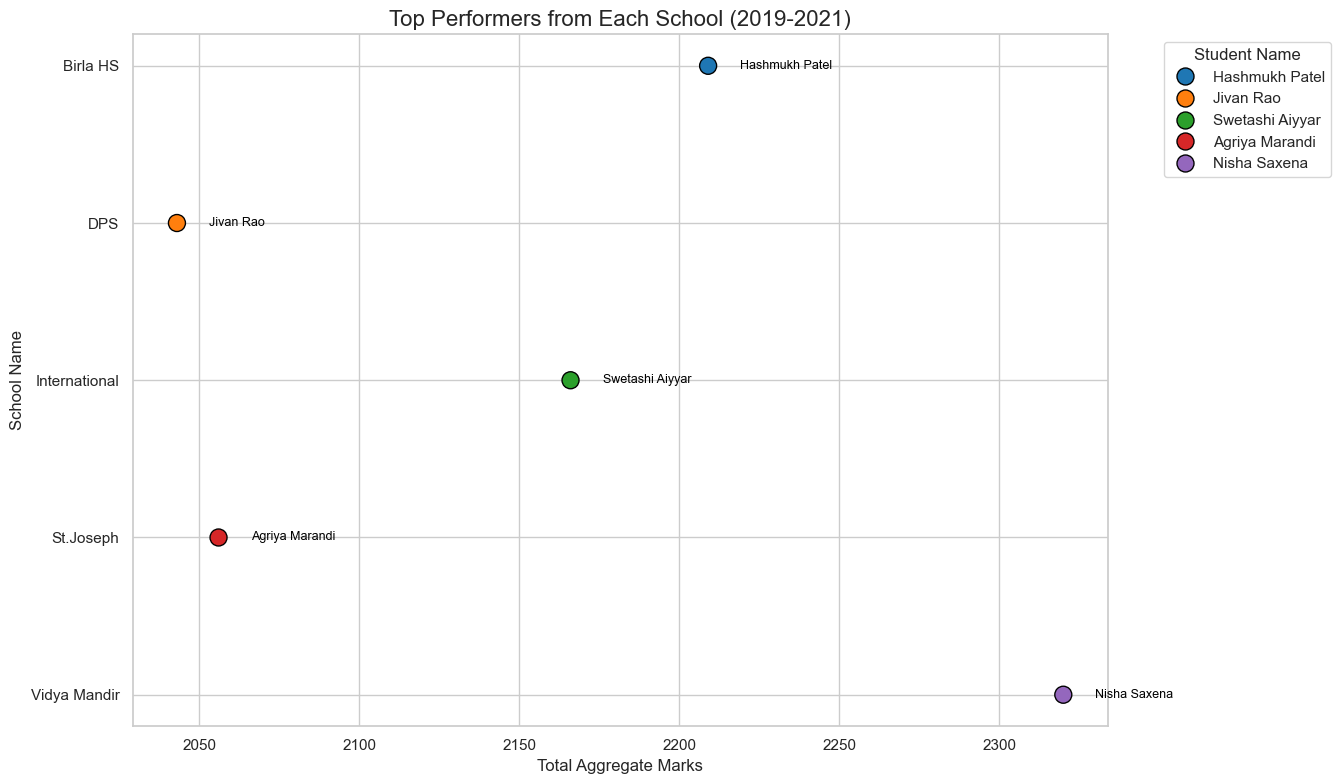

In [13]:
# Visualization for Problem Statement 1) Reward the top performer(student) of each school based on cumulative marks scored in last three years for all the subject
# Set the visualization style
sns.set_theme(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Total aggregate', 
    y='School Name', 
    hue='Student Name',  # Different colors for different students
    data=Top_Performers, 
    palette='tab10', 
    s=150,  # Size of the scatter points
    edgecolor='black'
)

# Add labels and title
plt.title('Top Performers from Each School (2019-2021)', fontsize=16)
plt.xlabel('Total Aggregate Marks', fontsize=12)
plt.ylabel('School Name', fontsize=12)

# Add text annotations for student names
for index, row in Top_Performers.iterrows():
    plt.text(row['Total aggregate'] + 10, index, row['Student Name'], 
             color='black', va='center', fontsize=9)

# Improve layout and show plot
plt.tight_layout()
plt.legend(title='Student Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
# Problem 2)Rank each student within their own school based on their total marks scored in the year 2020 and compare the marks of Rank 10 for each school by arranging them in descending order


# Read the combined file (adjust file path)
file_path = "Bangalore's_Schools_2020.xlsx"
combined_data = pd.read_excel(file_path)

# Define subject columns
subject_columns = ['Hindi', 'English', 'Mathematics', 'Physics', 'Chemistry',
                   'Biology', 'History', 'Geography', 'Civics', 'Computer Science', 'Physical Education']

# Calculate Total Marks for all students
combined_data['Total Marks'] = combined_data[subject_columns].sum(axis=1)

# Filter data for the year 2020
data_2020 = combined_data[combined_data['Year'] == 2020]

# Rank students within each school based on Total Marks (descending order)
data_2020['Rank'] = data_2020.groupby('School Name')['Total Marks'].rank(ascending=False, method='first')

# Filter for the 10th ranked student in each school
rank_10_students = data_2020[data_2020['Rank'] == 10]

# Sort the data by Total Marks in descending order
rank_10_students_sorted = rank_10_students.sort_values(by='Total Marks', ascending=False)

# Display the sorted 10th ranked students
print(rank_10_students_sorted[['School Name', 'Student Name', 'Total Marks', 'Rank']])



      School Name    Student Name  Total Marks  Rank
11   Vidya Mandir   Ganesh Sekhar          705  10.0
76       Birla HS     Derek Pinto          673  10.0
91  International  Jashwant Bhide          660  10.0
39      St.Joseph   Deep Dasgupta          649  10.0
53            DPS    Michel Dsuza          614  10.0


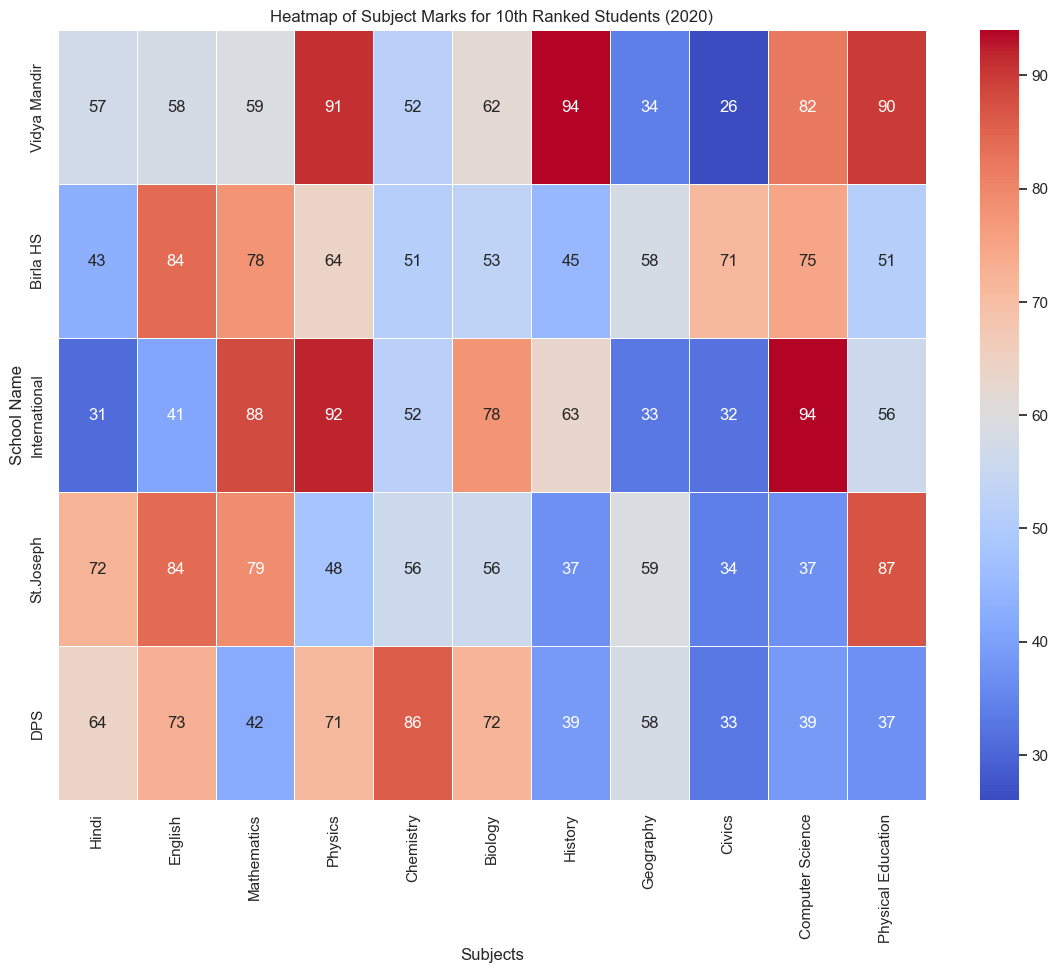

In [37]:
#Visualization  Problem 2)Rank each student within their own school based on their total marks scored in the year 2020 and compare the marks of Rank 10 for each school by arranging them in descending order


# Extracting subject marks for the 10th ranked students
subject_marks = rank_10_students_sorted.set_index('School Name')[subject_columns]

plt.figure(figsize=(14, 10))
sns.heatmap(subject_marks, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Subject Marks for 10th Ranked Students (2020)')
plt.xlabel('Subjects')
plt.ylabel('School Name')
plt.show()







In [17]:
#Problem Statement 3)Find out students with the highest improvement for each subject from 2019-21 combining all the schools together

# File paths for each year
file_2019 = "Bangalore's_Schools_2019.xlsx"
file_2020 = "Bangalore's_Schools_2020.xlsx"
file_2021 = "Bangalore's_School_2021.xlsx"

# Read each Excel file into a DataFrame
df_2019 = pd.read_excel(file_2019)
df_2020 = pd.read_excel(file_2020)
df_2021 = pd.read_excel(file_2021)



# Concatenate the DataFrames
df_all_years = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

# Display the first few rows to check the combined DataFrame
df_all_years


    
# Ensure the year column is available and correct
df_all_years = df_all_years.sort_values(by=['Student Roll', 'Year'])

# List of all subjects
subjects = [
    'Hindi', 'English', 'Mathematics', 'Physics', 'Chemistry', 'Biology', 
    'History', 'Geography', 'Civics', 'Computer Science', 'Physical Education'
]
# Create a dictionary to store the improvement for each subject
improvement = {}

# Calculate the improvement for each subject
for subject in subjects:
    # Pivot the DataFrame to get the marks for each year for each student
    df_subject = df_all_years.pivot(index='Student Roll', columns='Year', values=subject)
    
    # Check if marks increase from 2019 to 2020 and from 2020 to 2021
    df_subject['Improvement_2019_to_2020'] = df_subject[2020] >= df_subject[2019]
    df_subject['Improvement_2020_to_2021'] = df_subject[2021] >= df_subject[2020]
    
    # Filter out students who did not show gradual improvement
    df_subject_improved = df_subject[df_subject['Improvement_2019_to_2020'] & df_subject['Improvement_2020_to_2021']].copy()
    
    # If there are students who improved, find the student with the highest improvement
    if not df_subject_improved.empty:
        # Calculate the improvement from 2019 to 2021 (only for students who improved)
        df_subject_improved.loc[:, 'Improvement_2019_to_2021'] = df_subject_improved[2021] - df_subject_improved[2019]
        
        # Find the student with the highest improvement
        max_improvement_student = df_subject_improved['Improvement_2019_to_2021'].idxmax()
        
        # Retrieve the details of the student with the highest improvement
        max_improvement_row = df_all_years[df_all_years['Student Roll'] == max_improvement_student]
        max_improvement_value = df_subject_improved.loc[max_improvement_student, 'Improvement_2019_to_2021']
        
        improvement[subject] = {
            'Student Name': max_improvement_row['Student Name'].values[0],
            'School Name': max_improvement_row['School Name'].values[0],
            'Improvement': max_improvement_value
        }

# Display the highest improvement for each subject
for subject, details in improvement.items():
    print(f"Subject: {subject}")
    print(f"Student Name: {details['Student Name']}")
    print(f"School Name: {details['School Name']}")
    print(f"Improvement from 2019 to 2021: {details['Improvement']}")
    print("-" * 40)

Subject: Hindi
Student Name: Sonal Tripathi
School Name: Vidya Mandir
Improvement from 2019 to 2021: 71
----------------------------------------
Subject: English
Student Name: Niharika Popat
School Name: DPS
Improvement from 2019 to 2021: 53
----------------------------------------
Subject: Mathematics
Student Name: Manyathi Shetty
School Name: DPS
Improvement from 2019 to 2021: 67
----------------------------------------
Subject: Physics
Student Name: Praddep Meena
School Name: Vidya Mandir
Improvement from 2019 to 2021: 63
----------------------------------------
Subject: Chemistry
Student Name: Manshukh Bhayani
School Name: DPS
Improvement from 2019 to 2021: 65
----------------------------------------
Subject: Biology
Student Name: Atanu Sanyal
School Name: Birla HS
Improvement from 2019 to 2021: 46
----------------------------------------
Subject: History
Student Name: Albert Pinto
School Name: Vidya Mandir
Improvement from 2019 to 2021: 45
----------------------------------------


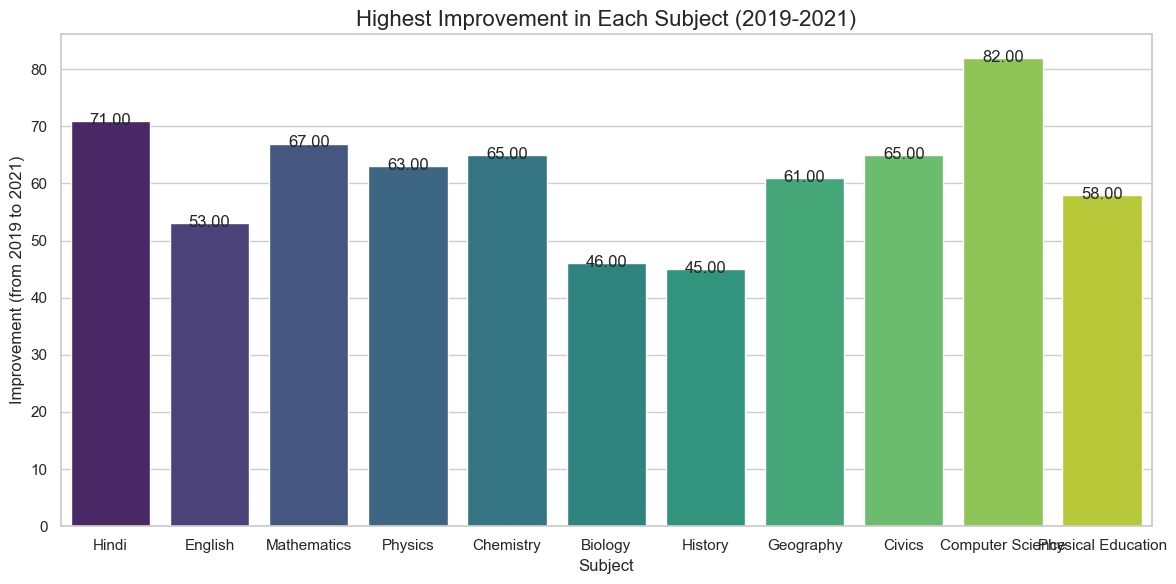

In [19]:
# Visualization problem 3)Find out students with the highest improvement for each subject from 2019-21 combining all the schools together



# Prepare data for visualization
subject_names = list(improvement.keys())
improvement_values = [details['Improvement'] for details in improvement.values()]
students = [details['Student Name'] for details in improvement.values()]
schools = [details['School Name'] for details in improvement.values()]

# Create a DataFrame for visualization
improvement_df = pd.DataFrame({
    'Subject': subject_names,
    'Improvement': improvement_values,
    'Student': students,
    'School': schools
})

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot to show the improvement in each subject
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=improvement_df, x='Subject', y='Improvement', hue='Subject', palette='viridis')

# Annotate each bar with the improvement value
for index, value in enumerate(improvement_values):
    bar_plot.text(index, value + 0.1, f'{value:.2f}', va='center', ha='center', fontsize=12)

# Set the plot title and labels
plt.title('Highest Improvement in Each Subject (2019-2021)', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Improvement (from 2019 to 2021)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [21]:
# problem 4)Identify best school for Arts, Science and Commerce streams based on marks scored by students in respective subjects for those streams in last three years
# Concatenate the DataFrames
df_all_years = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

# Define subjects for each stream
arts_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics']
science_subjects = ['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science']
commerce_subjects = ['Hindi', 'English', 'Mathematics', 'Computer Science', 'Physical Education']

# Function to calculate the best school for each stream
def best_school_for_stream(subjects):
    # Filter data for the selected subjects and make a copy of the DataFrame
    df_stream = df_all_years[['School Name', 'Student Roll', 'Student Name', 'Year'] + subjects].copy()
    
    # Calculate the average score for each student across the selected subjects
    df_stream['Average Marks'] = df_stream[subjects].mean(axis=1)
    
    # Group by 'School Name' and calculate the average of 'Average Marks' for each school
    df_school_avg = df_stream.groupby('School Name')['Average Marks'].mean().reset_index()
    
    # Identifying  the best school based on the highest average marks
    best_school = df_school_avg.loc[df_school_avg['Average Marks'].idxmax()]
    
    return best_school

# Geting the best school for Arts, Science, and Commerce streams
best_school_arts = best_school_for_stream(arts_subjects)
best_school_science = best_school_for_stream(science_subjects)
best_school_commerce = best_school_for_stream(commerce_subjects)

# Printing the best school for each stream
print(f"Best School for Arts Stream: {best_school_arts['School Name']}, Average Marks: {best_school_arts['Average Marks']}")
print(f"Best School for Science Stream: {best_school_science['School Name']}, Average Marks: {best_school_science['Average Marks']}")
print(f"Best School for Commerce Stream: {best_school_commerce['School Name']}, Average Marks: {best_school_commerce['Average Marks']}")

Best School for Arts Stream: Birla HS, Average Marks: 68.7
Best School for Science Stream: International, Average Marks: 69.98
Best School for Commerce Stream: Vidya Mandir, Average Marks: 66.27


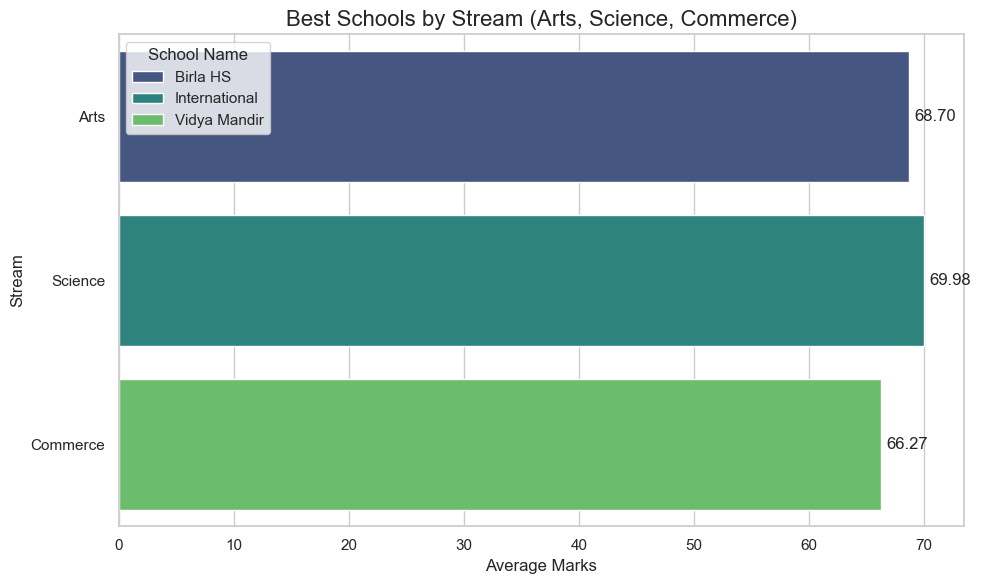

In [23]:
# Visualization  problem 4)Identify best school for Arts, Science and Commerce streams based on marks scored by students in respective subjects for those streams in last three years

# Data for best schools for each stream
best_schools_data = {
    'Stream': ['Arts', 'Science', 'Commerce'],
    'School Name': [best_school_arts['School Name'], best_school_science['School Name'], best_school_commerce['School Name']],
    'Average Marks': [best_school_arts['Average Marks'], best_school_science['Average Marks'], best_school_commerce['Average Marks']]
}

# Create a DataFrame for visualization
best_schools_df = pd.DataFrame(best_schools_data)

# Set the plot style
sns.set(style="whitegrid")

# Create a horizontal bar plot for the best schools in each stream
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=best_schools_df, x='Average Marks', y='Stream', hue='School Name', palette='viridis')

# Annotate the bars with the average marks
for index, value in enumerate(best_schools_df['Average Marks']):
    bar_plot.text(value + 0.5, index, f'{value:.2f}', va='center', fontsize=12)

# Set the plot title and labels
plt.title('Best Schools by Stream (Arts, Science, Commerce)', fontsize=16)
plt.xlabel('Average Marks', fontsize=12)
plt.ylabel('Stream', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [34]:
# problem 5)if the marks obtained for each subject can be categorised under 5 sections like below like poor,very poor average,good,very good Then calculate for each school how many students were in each category based on the avg. marks obtained each year

# Concatenate the DataFrames (assuming df_2019, df_2020, df_2021 are already loaded)
df_all_years = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

import pandas as pd

# Define all subjects (replace with your actual subject columns)
all_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics', 
                'Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science', 'Physical Education']

# Function to categorize marks into the predefined categories
def categorize_marks(marks):
    if marks <= 20:
        return 'Very Poor'
    elif 20 < marks <= 40:
        return 'Poor'
    elif 40 < marks <= 60:
        return 'Average'
    elif 60 < marks <= 80:
        return 'Good'
    elif 80 < marks <= 100:
        return 'Very Good'
    else:
        return 'Out of Range'  # For any marks outside of 0-100

# Calculate the average marks for each student across all subjects
df_all_years['Avg_Marks'] = df_all_years[all_subjects].mean(axis=1)

# Categorize the average marks for each student
df_all_years['Overall Category'] = df_all_years['Avg_Marks'].apply(categorize_marks)

# Group by School Name and Year to get the count of students in each category
category_count = (
    df_all_years.groupby(['School Name', 'Year', 'Overall Category'])
    .size()
    .reset_index(name='Count')
)

# Define all possible categories
all_categories = ['Very Poor', 'Poor', 'Average', 'Good', 'Very Good']

# Pivot the result to get categories as columns and counts as values
category_count_pivot = (
    category_count.pivot_table(index=['School Name', 'Year'], 
                               columns='Overall Category', 
                               values='Count', 
                               fill_value=0)
    .reindex(columns=all_categories, fill_value=0)  # Ensure all categories are present
)

# Display the result
print(category_count_pivot)


Overall Category    Very Poor  Poor  Average  Good  Very Good
School Name   Year                                           
Birla HS      2019          0     0      5.0  15.0          0
              2020          0     0      6.0  14.0          0
              2021          0     0      9.0  11.0          0
DPS           2019          0     0      8.0  12.0          0
              2020          0     0     19.0   1.0          0
              2021          0     0     14.0   6.0          0
International 2019          0     0      6.0  14.0          0
              2020          0     0     11.0   9.0          0
              2021          0     0      8.0  12.0          0
St.Joseph     2019          0     0     11.0   9.0          0
              2020          0     0     14.0   6.0          0
              2021          0     0     18.0   2.0          0
Vidya Mandir  2019          0     0      8.0  12.0          0
              2020          0     0      7.0  13.0          0
        

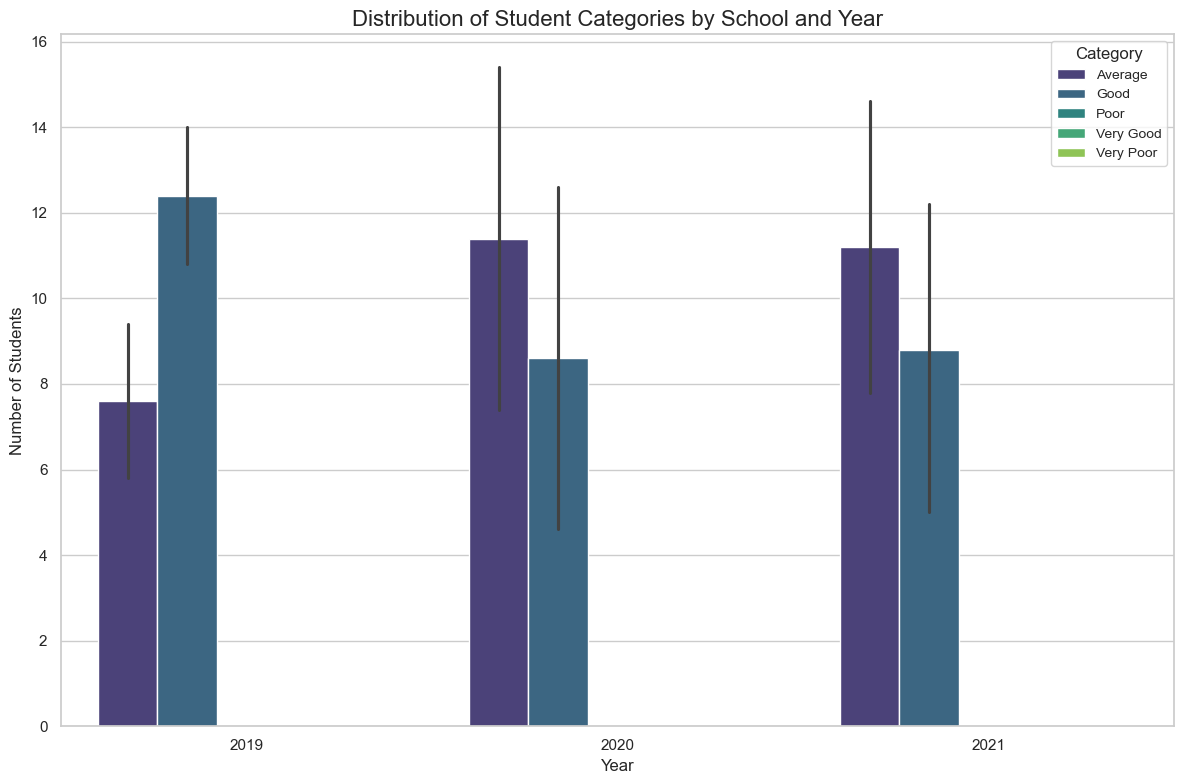

In [25]:
#visualization problem 5)if the marks obtained for each subject can be categorised under 5 sections like below like poor,very poor average,good,very good Then calculate for each school how many students were in each category based on the avg. marks obtained each year


# Concatenate the DataFrames (assuming df_2019, df_2020, df_2021 are already loaded)
df_all_years = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

# Define all subjects (replace with your actual subject columns)
all_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics', 
                'Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science', 'Physical Education']

# Function to categorize marks into the predefined categories
def categorize_marks(marks):
    if marks <= 20:
        return 'Very Poor'
    elif 20 < marks <= 40:
        return 'Poor'
    elif 40 < marks <= 60:
        return 'Average'
    elif 60 < marks <= 80:
        return 'Good'
    elif 80 < marks <= 100:
        return 'Very Good'
    else:
        return 'Out of Range'  # For any marks outside of 0-100

# Calculate the average marks for each student across all subjects
df_all_years['Avg_Marks'] = df_all_years[all_subjects].mean(axis=1)

# Categorize the average marks for each student
df_all_years['Overall Category'] = df_all_years['Avg_Marks'].apply(categorize_marks)

# Group by School Name and Year to get the count of students in each category
category_count = (
    df_all_years.groupby(['School Name', 'Year', 'Overall Category'])
    .size()
    .reset_index(name='Count')
)

# Define all possible categories
all_categories = ['Very Poor', 'Poor', 'Average', 'Good', 'Very Good']

# Pivot the result to get categories as columns and counts as values
category_count_pivot = (
    category_count.pivot_table(index=['School Name', 'Year'], 
                               columns='Overall Category', 
                               values='Count', 
                               fill_value=0)
    .reindex(columns=all_categories, fill_value=0)  # Ensure all categories are present
)

# Reset the index to prepare for melting
category_count_pivot_reset = category_count_pivot.reset_index()

# Melt the DataFrame for easier plotting
melted_data = category_count_pivot_reset.melt(
    id_vars=['School Name', 'Year'],
    value_vars=category_count_pivot_reset.columns.difference(['School Name', 'Year']),
    var_name='Category',
    value_name='Count'
)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=melted_data,
    x='Year',
    y='Count',
    hue='Category',
    palette='viridis'
)

# Set the title and labels
plt.title('Distribution of Student Categories by School and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.tight_layout()
plt.show()

In [46]:
# problem 6) Which is the best school for each year 2019, 2020 and 2021 based on highest no. of students in Good and Very Good category
df_all_years = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)
# Define all subjects
all_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics', 
                'Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science', 'Physical Education']

# Function to categorize marks into predefined categories
def categorize_marks(marks):
    if marks <= 20:
        return 'Very Poor'
    elif 20 < marks <= 40:
        return 'Poor'
    elif 40 < marks <= 60:
        return 'Average'
    elif 60 < marks <= 80:
        return 'Good'
    elif 80 < marks <= 100:
        return 'Very Good'
    else:
        return 'Out of Range'

# Calculate the average marks for each student across all subjects
df_all_years['Avg_Marks'] = df_all_years[all_subjects].mean(axis=1)

# Categorize the average marks for each student
df_all_years['Overall Category'] = df_all_years['Avg_Marks'].apply(categorize_marks)

# Group by School Name, Year, and Overall Category to get the count of students in each category
category_count = (
    df_all_years.groupby(['School Name', 'Year', 'Overall Category'])
    .size()
    .reset_index(name='Count')
)

# Pivot the result to get categories as columns and counts as values
category_count_pivot = category_count.pivot_table(
    index=['School Name', 'Year'],
    columns='Overall Category',
    values='Count',
    fill_value=0
)

# Display the pivot table
print("Category Counts Pivot Table:")
print(category_count_pivot)

# Identify the school with the highest number of students in the "Good" category for each year
best_schools_per_year = {}

for year in [2019, 2020, 2021]:
    # Filter for the "Good" category for the specific year
    good_category = category_count_pivot.loc[(slice(None), year), 'Good']
    
    # Find the school with the highest count of students in the "Good" category
    best_school_for_year = good_category.idxmax()[0]
    best_count = good_category.max()
    
    best_schools_per_year[year] = {
        'School Name': best_school_for_year,
        'Count of Good Students': best_count
    }

# Display the best school for each year based on the highest number of students in the "Good" category
for year, details in best_schools_per_year.items():
    print(f"\nBest School for {year}:")
    print(f"School Name: {details['School Name']}")
    print(f"Number of 'Good' Students: {details['Count of Good Students']}")

Category Counts Pivot Table:
Overall Category    Average  Good
School Name   Year               
Birla HS      2019      5.0  15.0
              2020      6.0  14.0
              2021      9.0  11.0
DPS           2019      8.0  12.0
              2020     19.0   1.0
              2021     14.0   6.0
International 2019      6.0  14.0
              2020     11.0   9.0
              2021      8.0  12.0
St.Joseph     2019     11.0   9.0
              2020     14.0   6.0
              2021     18.0   2.0
Vidya Mandir  2019      8.0  12.0
              2020      7.0  13.0
              2021      7.0  13.0

Best School for 2019:
School Name: Birla HS
Number of 'Good' Students: 15.0

Best School for 2020:
School Name: Birla HS
Number of 'Good' Students: 14.0

Best School for 2021:
School Name: Vidya Mandir
Number of 'Good' Students: 13.0


Category Counts Pivot Table:
Overall Category    Average  Good
School Name   Year               
Birla HS      2019      5.0  15.0
              2020      6.0  14.0
              2021      9.0  11.0
DPS           2019      8.0  12.0
              2020     19.0   1.0
              2021     14.0   6.0
International 2019      6.0  14.0
              2020     11.0   9.0
              2021      8.0  12.0
St.Joseph     2019     11.0   9.0
              2020     14.0   6.0
              2021     18.0   2.0
Vidya Mandir  2019      8.0  12.0
              2020      7.0  13.0
              2021      7.0  13.0

Best School for 2019:
School Name: Birla HS
Number of 'Good' Students: 15.0

Best School for 2020:
School Name: Birla HS
Number of 'Good' Students: 14.0

Best School for 2021:
School Name: Vidya Mandir
Number of 'Good' Students: 13.0


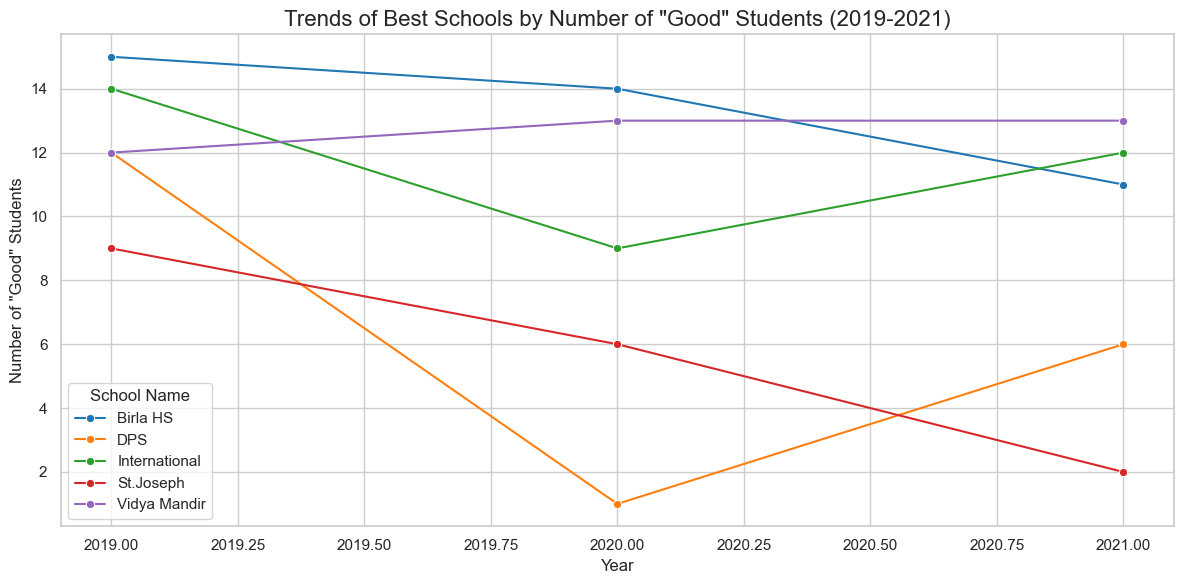

In [50]:
# visualization  problem 6) Which is the best school for each year 2019, 2020 and 2021 based on highest no. of students in Good and Very Good category

# Concatenate all years' data into one DataFrame
df_all_years = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)

# Define all subjects
all_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics', 
                'Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science', 'Physical Education']

# Function to categorize marks into predefined categories
def categorize_marks(marks):
    if marks <= 20:
        return 'Very Poor'
    elif 20 < marks <= 40:
        return 'Poor'
    elif 40 < marks <= 60:
        return 'Average'
    elif 60 < marks <= 80:
        return 'Good'
    elif 80 < marks <= 100:
        return 'Very Good'
    else:
        return 'Out of Range'

# Calculate the average marks for each student across all subjects
df_all_years['Avg_Marks'] = df_all_years[all_subjects].mean(axis=1)

# Categorize the average marks for each student
df_all_years['Overall Category'] = df_all_years['Avg_Marks'].apply(categorize_marks)

# Group by School Name, Year, and Overall Category to get the count of students in each category
category_count = (
    df_all_years.groupby(['School Name', 'Year', 'Overall Category'])
    .size()
    .reset_index(name='Count')
)

# Pivot the result to get categories as columns and counts as values
category_count_pivot = category_count.pivot_table(
    index=['School Name', 'Year'],
    columns='Overall Category',
    values='Count',
    fill_value=0
)

# Display the pivot table
print("Category Counts Pivot Table:")
print(category_count_pivot)

# Identify the school with the highest number of students in the "Good" category for each year
best_schools_per_year = {}

for year in [2019, 2020, 2021]:
    # Filter for the "Good" category for the specific year
    good_category = category_count_pivot.loc[(slice(None), year), 'Good']
    
    # Find the school with the highest count of students in the "Good" category
    best_school_for_year = good_category.idxmax()[0]
    best_count = good_category.max()
    
    best_schools_per_year[year] = {
        'School Name': best_school_for_year,
        'Count of Good Students': best_count
    }

# Display the best school for each year based on the highest number of students in the "Good" category
for year, details in best_schools_per_year.items():
    print(f"\nBest School for {year}:")
    print(f"School Name: {details['School Name']}")
    print(f"Number of 'Good' Students: {details['Count of Good Students']}")

# Visualization: Plotting trends of the number of 'Good' students over the years for each school

# Prepare data for the plot
good_students_data = category_count[category_count['Overall Category'] == 'Good']

# Set visualization style
sns.set_theme(style="whitegrid")

# Create a line plot for trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=good_students_data,
    x='Year',
    y='Count',
    hue='School Name',
    marker='o',
    palette='tab10'
)

# Add titles and labels
plt.title('Trends of Best Schools by Number of "Good" Students (2019-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of "Good" Students', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [27]:
# problem 7) Which is the fastest-growing School in Bangalore (Overall and Streamwise)?
df_all_years = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)
# Assuming df_all_years is already loaded and contains data for all years (2019-2021)

# Define the subjects for each stream
arts_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics']
science_subjects = ['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science']
commerce_subjects = ['Hindi', 'English', 'Mathematics', 'Computer Science', 'Physical Education']

# Function to calculate the average marks for each student across all subjects
def calculate_avg_marks(df, subjects):
    return df[subjects].mean(axis=1)

# Calculate average marks for each student in Arts, Science, and Commerce streams
df_all_years['Arts_Avg_Marks'] = calculate_avg_marks(df_all_years, arts_subjects)
df_all_years['Science_Avg_Marks'] = calculate_avg_marks(df_all_years, science_subjects)
df_all_years['Commerce_Avg_Marks'] = calculate_avg_marks(df_all_years, commerce_subjects)

# Calculate the improvement in average marks year-on-year for each stream and overall
df_all_years['Overall_Avg_Marks'] = df_all_years[arts_subjects + science_subjects + commerce_subjects].mean(axis=1)
df_all_years['Arts_Improvement'] = df_all_years.groupby('School Name')['Arts_Avg_Marks'].diff().fillna(0)
df_all_years['Science_Improvement'] = df_all_years.groupby('School Name')['Science_Avg_Marks'].diff().fillna(0)
df_all_years['Commerce_Improvement'] = df_all_years.groupby('School Name')['Commerce_Avg_Marks'].diff().fillna(0)
df_all_years['Overall_Improvement'] = df_all_years.groupby('School Name')['Overall_Avg_Marks'].diff().fillna(0)

# Group the data by school and get the total improvement for each stream
school_improvement = df_all_years.groupby('School Name')[['Arts_Improvement', 'Science_Improvement', 'Commerce_Improvement', 'Overall_Improvement']].sum()

# Identify the fastest-growing school in each stream and overall
fastest_growing_arts_school = school_improvement['Arts_Improvement'].idxmax()
fastest_growing_science_school = school_improvement['Science_Improvement'].idxmax()
fastest_growing_commerce_school = school_improvement['Commerce_Improvement'].idxmax()
fastest_growing_overall_school = school_improvement['Overall_Improvement'].idxmax()

# Display the results
print(f"Fastest Growing School in Arts: {fastest_growing_arts_school}")
print(f"Fastest Growing School in Science: {fastest_growing_science_school}")
print(f"Fastest Growing School in Commerce: {fastest_growing_commerce_school}")
print(f"Fastest Growing School Overall: {fastest_growing_overall_school}")


Fastest Growing School in Arts: Vidya Mandir
Fastest Growing School in Science: DPS
Fastest Growing School in Commerce: Vidya Mandir
Fastest Growing School Overall: Vidya Mandir


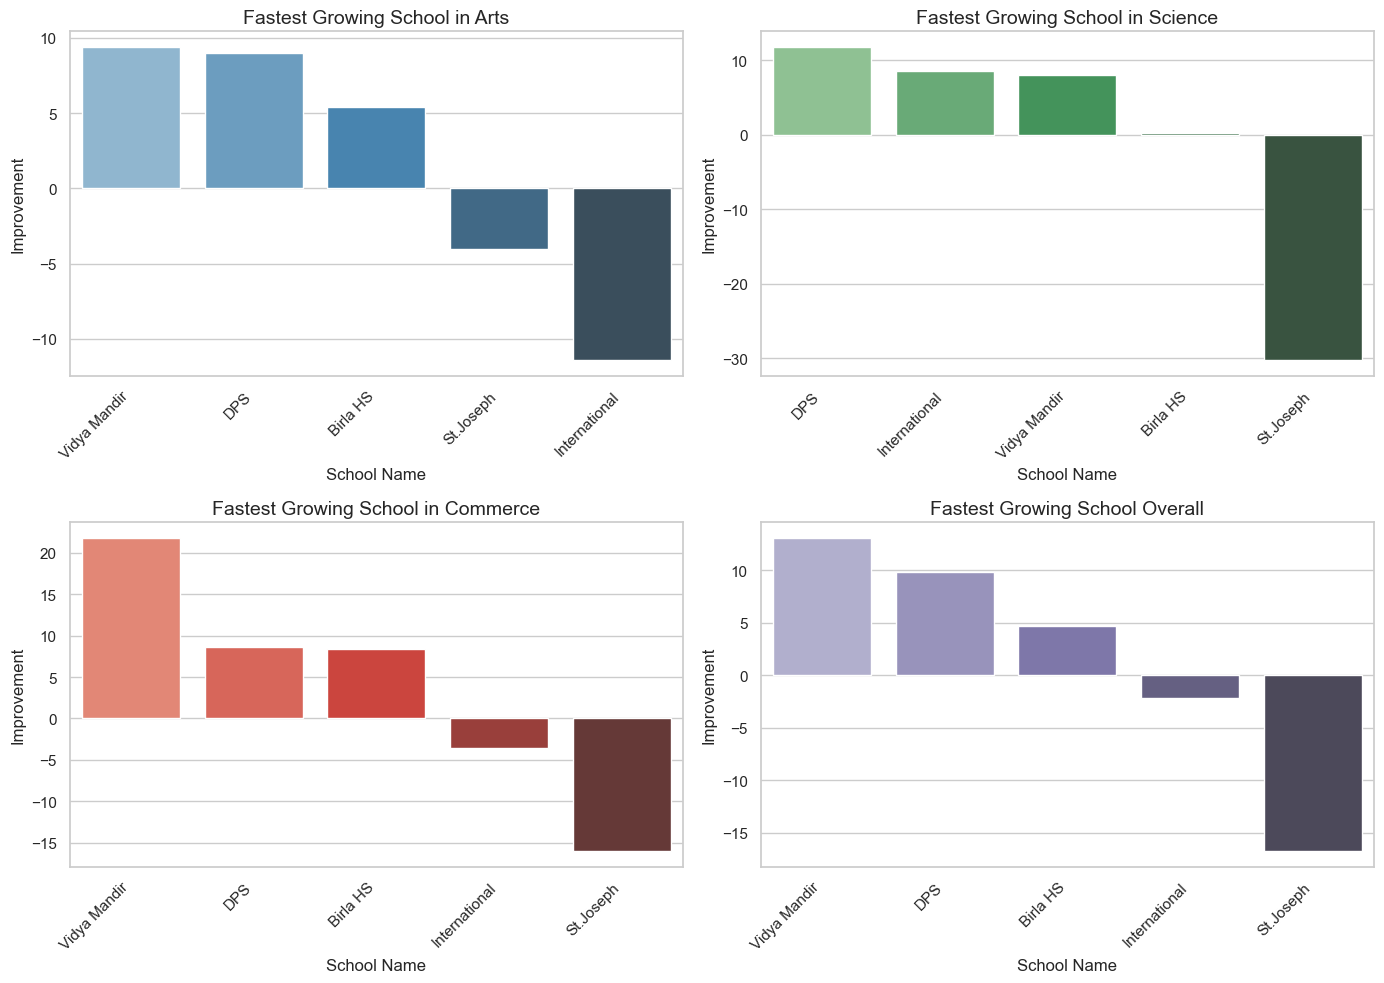

In [29]:
 #Visualization problem 7) Which is the fastest-growing School in Bangalore (Overall and Streamwise)?
# Assuming school_improvement DataFrame is already available

# Set up the plotting style
sns.set(style="whitegrid")

# Create a figure with subplots for each stream and overall
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Set the titles for each subplot
axes[0, 0].set_title('Fastest Growing School in Arts', fontsize=14)
axes[0, 1].set_title('Fastest Growing School in Science', fontsize=14)
axes[1, 0].set_title('Fastest Growing School in Commerce', fontsize=14)
axes[1, 1].set_title('Fastest Growing School Overall', fontsize=14)

# Data for plotting: improvement in each stream and overall
stream_improvement_data = {
    'Arts': school_improvement[['Arts_Improvement']].sort_values(by='Arts_Improvement', ascending=False).head(10),
    'Science': school_improvement[['Science_Improvement']].sort_values(by='Science_Improvement', ascending=False).head(10),
    'Commerce': school_improvement[['Commerce_Improvement']].sort_values(by='Commerce_Improvement', ascending=False).head(10),
    'Overall': school_improvement[['Overall_Improvement']].sort_values(by='Overall_Improvement', ascending=False).head(10)
}

# Plot the data for each stream and overall improvement
sns.barplot(x=stream_improvement_data['Arts'].index, y=stream_improvement_data['Arts']['Arts_Improvement'], ax=axes[0, 0], palette='Blues_d', hue=stream_improvement_data['Arts'].index)
sns.barplot(x=stream_improvement_data['Science'].index, y=stream_improvement_data['Science']['Science_Improvement'], ax=axes[0, 1], palette='Greens_d', hue=stream_improvement_data['Science'].index)
sns.barplot(x=stream_improvement_data['Commerce'].index, y=stream_improvement_data['Commerce']['Commerce_Improvement'], ax=axes[1, 0], palette='Reds_d', hue=stream_improvement_data['Commerce'].index)
sns.barplot(x=stream_improvement_data['Overall'].index, y=stream_improvement_data['Overall']['Overall_Improvement'], ax=axes[1, 1], palette='Purples_d', hue=stream_improvement_data['Overall'].index)

# Rotate the x-axis labels for better readability
for ax in axes.flat:
    ax.set_xticks(ax.get_xticks())  # Ensure we set tick locations first
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels for each subplot
for ax in axes.flat:
    ax.set_xlabel('School Name')
    ax.set_ylabel('Improvement')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
